# K Nearest Neighbors

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

### Dataset link
https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

## Import Libraries



In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline




# Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("heart_cleveland_upload")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = df.iloc[:, -1]

In [5]:
df.shape  # show entries and atributes

(297, 14)

In [6]:
df.size # size in bytes

4158

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('condition',axis=1))
scaled_features = scaler.transform(df.drop('condition',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [9]:
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292
3,1.157555,0.691095,-2.240629,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['condition'],
                                                    test_size=0.25)


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [20]:
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train,y_train)

end = time.time()
print('Time of Training the Algorithm in second',end - start)

Time of Training the Algorithm in second 1.7588932514190674


In [23]:
pred = knn.predict(X_test)

In [24]:
#plt.scatter(X_train[:, 0], X_train[:, 2], s= 30, c= y_train, cmap=plt.cm.Paired)

In [25]:
#plt.show()

## Predictions and Evaluations

Let's evaluate our KNN model!

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))

[[34 10]
 [ 6 25]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.71      0.81      0.76        31

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.79      0.79      0.79        75



***Precision and recal is actually using for information retrival 
TP= is the actual postive rate / by TP + FP 
( out of the total positive predicted result by the model waht is the % of actual positive rate.
F1score is the with 2 with (prec * recal)/ (prec + recal )***

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [29]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

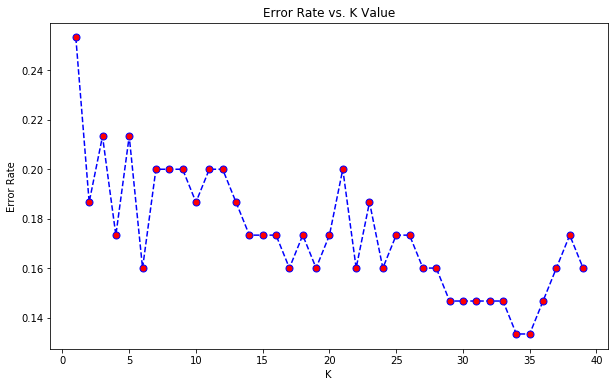

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K ')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>6, 7,8 the error rate just tends to hover around. Let's retrain the model with that and check the classification report!

In [31]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[31 13]
 [ 6 25]]


              precision    recall  f1-score   support

           0       0.84      0.70      0.77        44
           1       0.66      0.81      0.72        31

    accuracy                           0.75        75
   macro avg       0.75      0.76      0.75        75
weighted avg       0.76      0.75      0.75        75



In [32]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K ')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K 


[[34 10]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.72      0.84      0.78        31

    accuracy                           0.80        75
   macro avg       0.80      0.81      0.80        75
weighted avg       0.81      0.80      0.80        75



# Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [33]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [35]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [36]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)

In [37]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

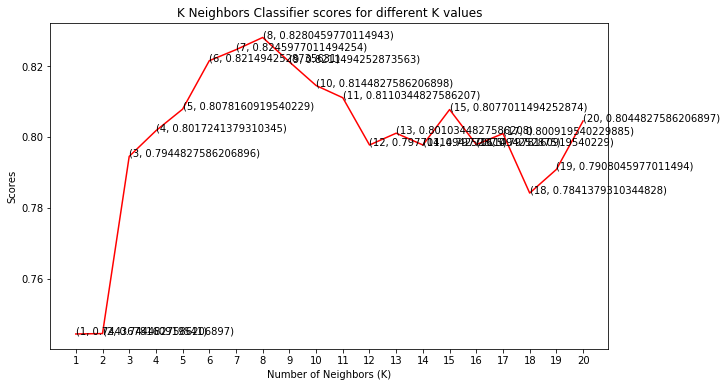

In [38]:
plt.figure(figsize=(10,6))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
import matplotlib.pyplot as plt



In [54]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [56]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, pred))

Accuracy Score : 0.8
